# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("loan_approval_data.csv")
data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

# Handling Missing Values

In [4]:
categorical_columns=data.select_dtypes(include=["object"]).columns
numerical_columns=data.select_dtypes(include=["float64"]).columns

In [8]:
from sklearn.impute import SimpleImputer
num_imp=SimpleImputer(strategy="mean")
data[numerical_columns]=num_imp.fit_transform(data[numerical_columns])

In [10]:
num_imp=SimpleImputer(strategy="most_frequent")
data[categorical_columns]=num_imp.fit_transform(data[categorical_columns])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

# Exploratory Data Analysis

Text(0.5, 1.0, 'Is loan approved or not')

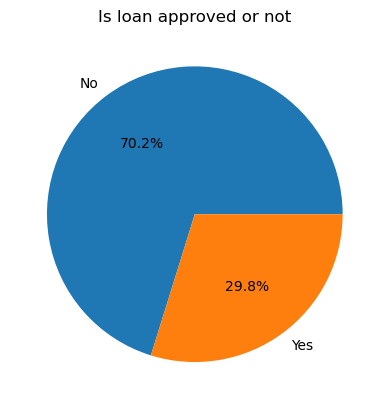

In [13]:
#How balanced our classes are?
classes_count=data["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%")
plt.title("Is loan approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

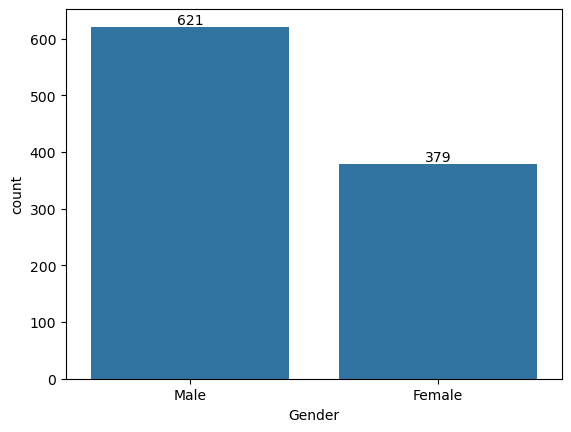

In [18]:
#analyse categories
gender_count=data["Gender"].value_counts()
ax=sns.barplot(gender_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

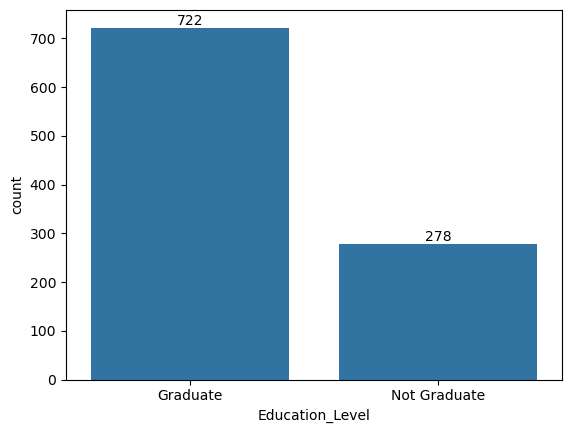

In [19]:

edu_count=data["Education_Level"].value_counts()
ax=sns.barplot(edu_count)
ax.bar_label(ax.containers[0])

[Text(0, 0, '422'),
 Text(0, 0, '202'),
 Text(0, 0, '144'),
 Text(0, 0, '135'),
 Text(0, 0, '97')]

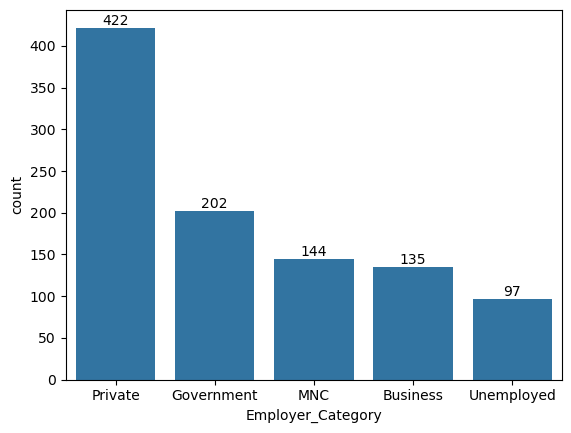

In [20]:
emp_count=data["Employer_Category"].value_counts()
ax=sns.barplot(emp_count)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

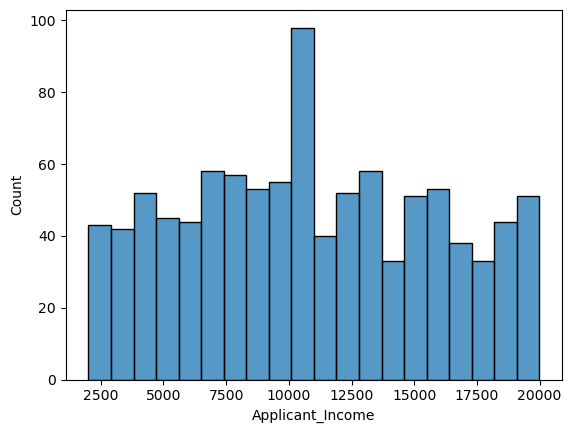

In [26]:
#Analyse income
sns.histplot(
    data=data,
    x=data["Applicant_Income"],
    bins=20
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

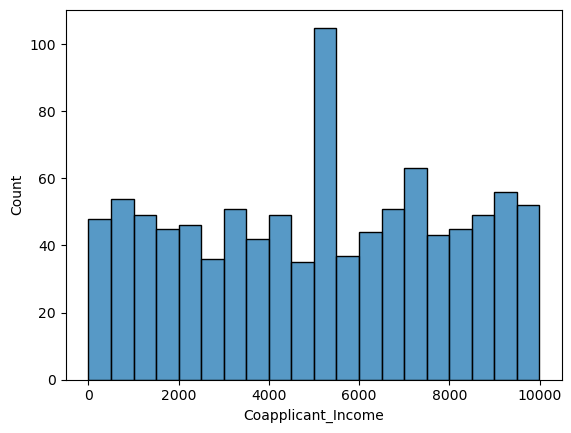

In [27]:
sns.histplot(
    data=data,
    x=data["Coapplicant_Income"],
    bins=20
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

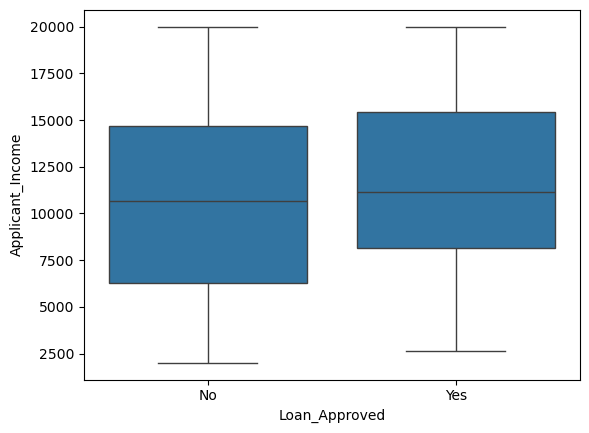

In [30]:
sns.boxplot(
    data=data,
    x="Loan_Approved",
    y="Applicant_Income"
)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

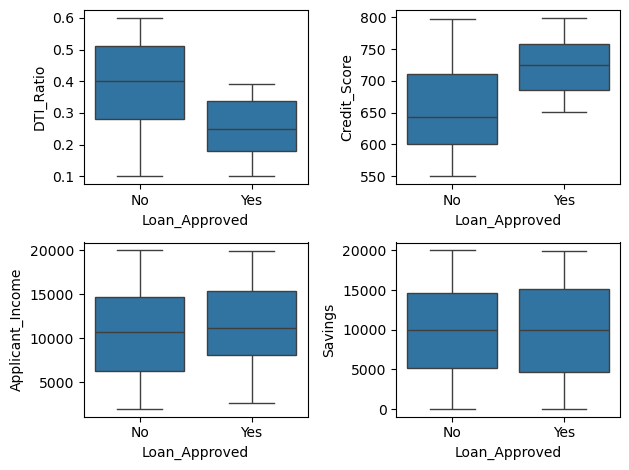

In [35]:
fig ,axes=plt.subplots(2,2)
sns.boxplot(ax=axes[0,0],data=data,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[0,1],data=data,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=data,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[1,1],data=data,x="Loan_Approved",y="Savings")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

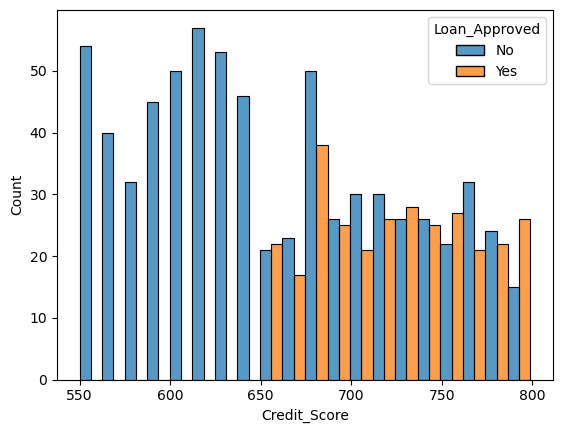

In [38]:
#Credit score with loan approved
sns.histplot(
    data=data,
    x="Credit_Score",
    hue="Loan_Approved",
    multiple="dodge",
    bins=20
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

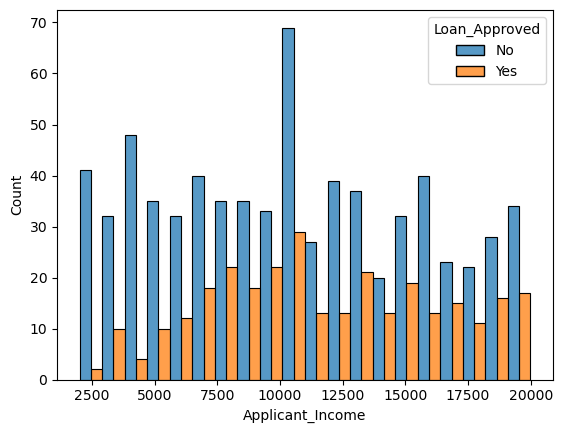

In [39]:
#Credit score with loan approved
sns.histplot(
    data=data,
    x="Applicant_Income",
    hue="Loan_Approved",
    multiple="dodge",
    bins=20
)

In [40]:
data=data.drop("Applicant_ID",axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [42]:
data.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age',
       'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans',
       'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender',
       'Employer_Category', 'Loan_Approved'],
      dtype='object')

# Feature Encoding

In [44]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [45]:
le=LabelEncoder()
data["Loan_Approved"]=le.fit_transform(data["Loan_Approved"])
data["Education_Level"]=le.fit_transform(data["Education_Level"])

In [50]:

columns=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender","Employer_Category"]
ohe=OneHotEncoder(drop="first",sparse_output=False,handle_unknown="ignore")
encoded=ohe.fit_transform(data[columns])
encoded_data=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(columns),index=data.index)

In [51]:
encoded_data.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [55]:
data=pd.concat([data.drop(columns=columns),encoded_data],axis=1)

In [56]:
data.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [57]:
num_colms=data.select_dtypes(include="number")
corr_matrix=num_colms.corr()

In [58]:
corr_matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,0.032794,0.074209,-0.031234,0.004845,-0.036260,-0.020871,-0.025011,0.102589,-0.044639,-0.011995
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,0.028000,0.016022,0.059549,-0.010058,0.030045,-0.010148,-0.001146,0.037640,0.004312,-0.047929
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,-0.006283,0.029865,0.037293,0.003100,-0.025661,0.048402,-0.066041,0.021232,-0.012960,0.072462
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,-0.044642,0.027343,-0.005785,-0.032278,0.024082,0.013706,-0.009250,-0.018757,0.030197,-0.054147
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,0.026013,-0.008658,0.015324,-0.006946,0.004445,-0.039739,-0.007076,0.066736,-0.000049,-0.046087
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,-0.010035,0.001777,0.023212,-0.053971,0.035629,-0.038762,-0.009642,0.030520,-0.019306,0.045391
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,0.040432,-0.014125,-0.036648,0.044898,-0.006156,0.009624,-0.007214,0.002090,-0.003506,0.026018
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,0.032558,-0.012217,-0.028948,0.005438,0.016833,-0.006667,-0.011683,0.004381,-0.030208,0.027178
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,0.040406,-0.050975,-0.007120,0.020061,0.007975,0.000897,0.035760,-0.013464,-0.014480,-0.009655
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,-0.006119,-0.000930,0.032498,0.040206,-0.050076,0.103456,0.013108,-0.025975,0.013923,-0.026566


In [59]:
num_colms.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education          

<Axes: >

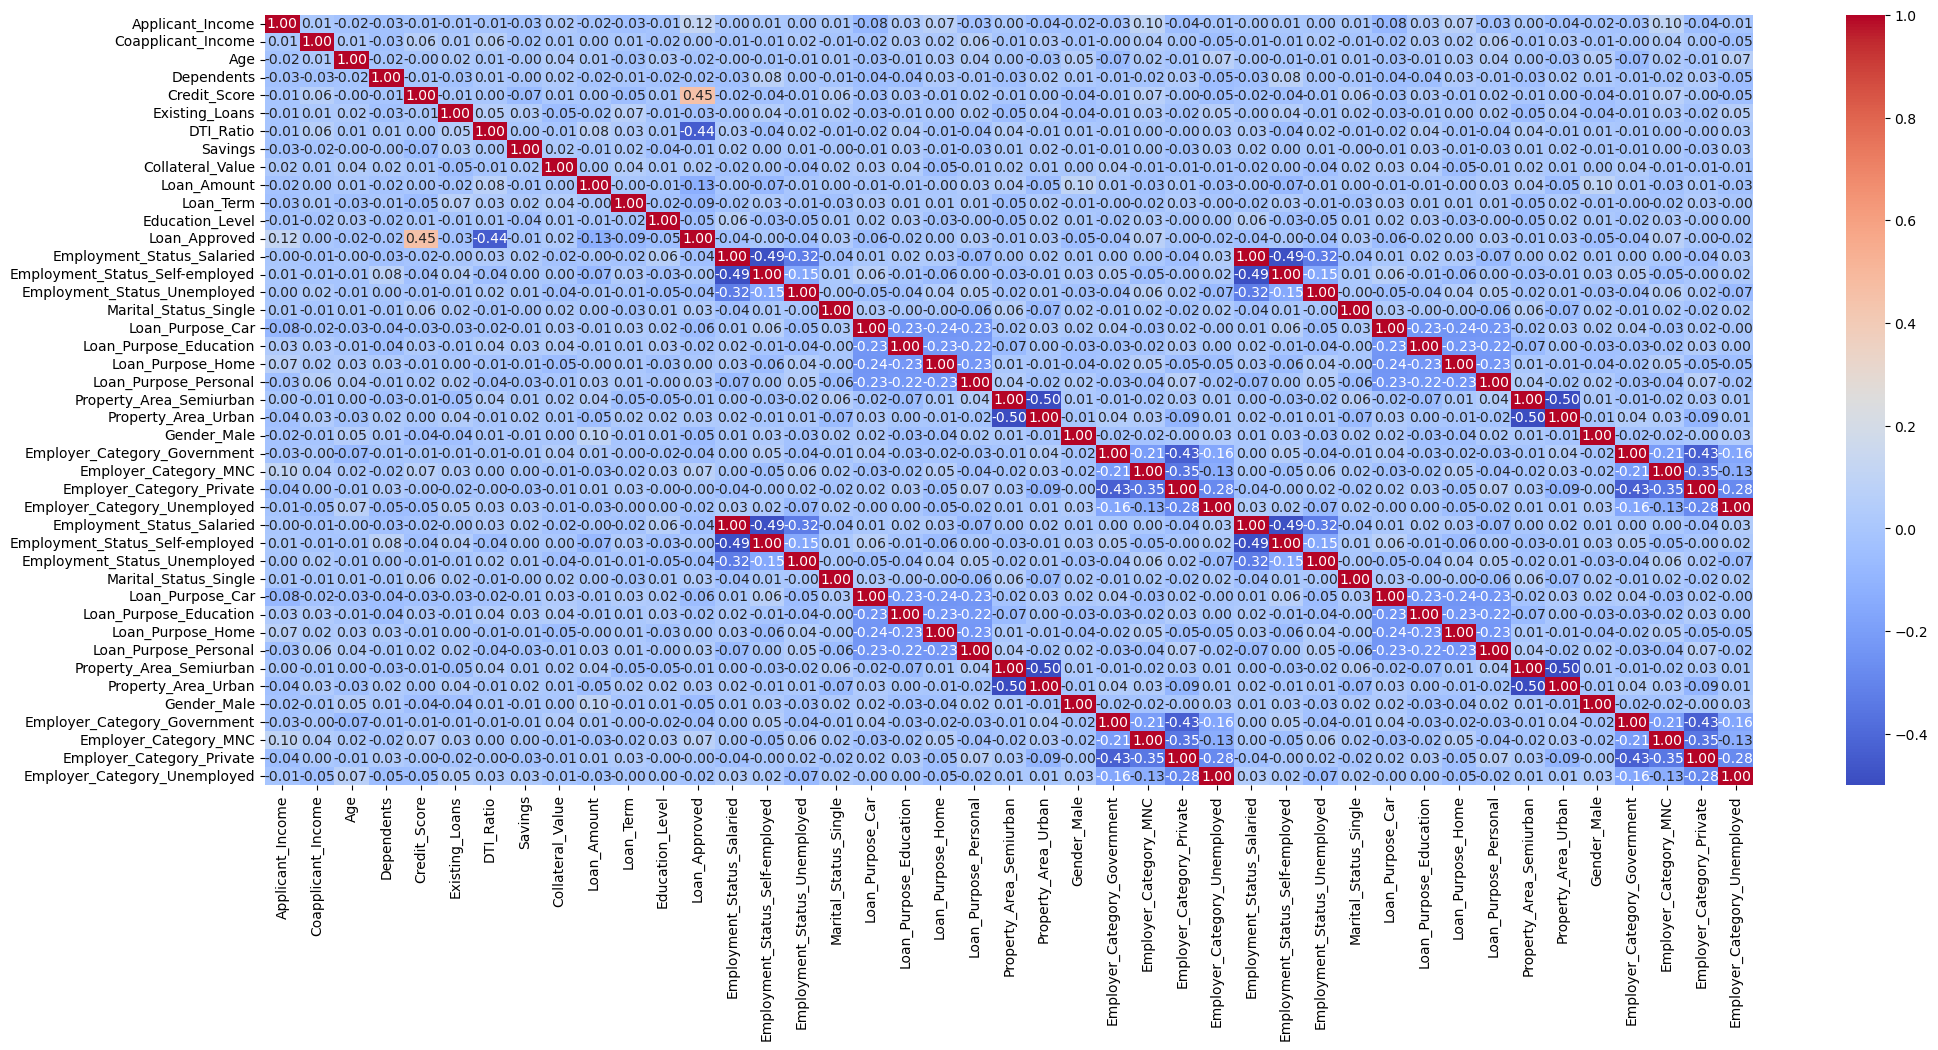

In [67]:
plt.figure(figsize=(24,10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

# Train Test Split and Feature Scaling

In [68]:
x=data.drop("Loan_Approved",axis=1)
y=data["Loan_Approved"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)

In [70]:
x_test_scaled=ss.transform(x_test)

In [93]:
#Logistic_regression
from sklearn.metrics import accuracy_score,precision_score
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred=log_model.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Accuracy:  0.88
Precision:  0.7846153846153846
Recall:  0.8360655737704918
F1:  0.8095238095238095
Confusion matrix:  [[125  14]
 [ 10  51]]


In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled,y_train)
y_pred=knn_model.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Accuracy:  0.71
Precision:  0.5283018867924528
Recall:  0.45901639344262296
F1:  0.49122807017543857
Confusion matrix:  [[114  25]
 [ 33  28]]


In [79]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(x_train_scaled,y_train)
y_pred=gnb_model.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Accuracy:  0.825
Precision:  0.7407407407407407
Recall:  0.6557377049180327
F1:  0.6956521739130435
Confusion matrix:  [[125  14]
 [ 21  40]]


In [88]:
data["new_credit_score"]=data["Credit_Score"]**2
data["new_DTI_Ratio"]=data["DTI_Ratio"]**2
x=data.drop(columns=["Credit_Score","Loan_Approved","DTI_Ratio"],axis=1)
y=data["Loan_Approved"]

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [90]:
#Logistic_regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred=log_model.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Accuracy:  0.88
Precision:  0.7846153846153846
Recall:  0.8360655737704918
F1:  0.8095238095238095
Confusion matrix:  [[125  14]
 [ 10  51]]


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled,y_train)
y_pred=knn_model.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Accuracy:  0.685
Precision:  0.48214285714285715
Recall:  0.4426229508196721
F1:  0.46153846153846156
Confusion matrix:  [[110  29]
 [ 34  27]]


In [92]:
from sklearn.naive_bayes import GaussianNB
gnb_model=GaussianNB()
gnb_model.fit(x_train_scaled,y_train)
y_pred=gnb_model.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1: ",f1_score(y_test,y_pred))
print("Confusion matrix: ",confusion_matrix(y_test,y_pred))

Logistic Regression
Accuracy:  0.825
Precision:  0.7407407407407407
Recall:  0.6557377049180327
F1:  0.6956521739130435
Confusion matrix:  [[125  14]
 [ 21  40]]
